# Advanced Visualizations

## Set-Up

In [1]:
using DrWatson
@quickactivate "CategoricalDataScience"

In [2]:
using CairoMakie
using CSV
using GeoMakie
using Polylabel
using DataFrames
using GeoDataFrames
using Distributions
using StatsBase
using Statistics
using SwarmMakie
using ZipFile
using Shapefile

In [4]:
table = Shapefile.Table(joinpath("..", "..", "data", "census", "tl_2024_us_state.zip")) |> DataFrame


Row,geometry,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
,Polygon?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,Int64?,Int64?,String?,String?
1,Polygon(35242 Points),3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266513826,488918898,+38.6472854,-080.6183274
2,Polygon(20603 Points),3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138965379385,45968913048,+28.3989775,-082.5143005
3,Polygon(19761 Points),2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778206717,6216848695,+40.1028754,-089.1526108
4,Polygon(40293 Points),2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244791203,18937236061,+46.3159573,-094.1996043
5,Polygon(26093 Points),3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151223822,6979843236,+38.9466584,-076.6744939
6,Polygon(2669 Points),1,1,44,01219835,44,0400000US44,RI,Rhode Island,00,G4000,A,2677768885,1323681453,+41.5964850,-071.5264901
7,Polygon(35120 Points),4,8,16,01779783,16,0400000US16,ID,Idaho,00,G4000,A,214050504522,2390996667,+44.3484222,-114.5588538
8,Polygon(16608 Points),1,1,33,01779794,33,0400000US33,NH,New Hampshire,00,G4000,A,23190211616,1025871482,+43.6727945,-071.5841886
9,Polygon(32133 Points),3,5,37,01027616,37,0400000US37,NC,North Carolina,00,G4000,A,125935965771,13453455061,+35.5397100,-079.1308636


In [9]:
# count the number of unique values in each column

one_unique = Vector{String}()

for col in names(table)
    #println("Column: ", col)
    #println("Unique values: ", length(unique(table[!, col])))
    if length(unique(table[!, col])) == 1
        push!(one_unique, col)
    end
end

println("Columns with only one unique value: ", one_unique)
# drop the columns with only one unique value
select!(table, Not(one_unique))
table

Columns with only one unique value: ["LSAD", "MTFCC", "FUNCSTAT"]


Row,geometry,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,ALAND,AWATER,INTPTLAT,INTPTLON
,Polygon?,String?,String?,String?,String?,String?,String?,String?,String?,Int64?,Int64?,String?,String?
1,Polygon(35242 Points),3,5,54,01779805,54,0400000US54,WV,West Virginia,62266513826,488918898,+38.6472854,-080.6183274
2,Polygon(20603 Points),3,5,12,00294478,12,0400000US12,FL,Florida,138965379385,45968913048,+28.3989775,-082.5143005
3,Polygon(19761 Points),2,3,17,01779784,17,0400000US17,IL,Illinois,143778206717,6216848695,+40.1028754,-089.1526108
4,Polygon(40293 Points),2,4,27,00662849,27,0400000US27,MN,Minnesota,206244791203,18937236061,+46.3159573,-094.1996043
5,Polygon(26093 Points),3,5,24,01714934,24,0400000US24,MD,Maryland,25151223822,6979843236,+38.9466584,-076.6744939
6,Polygon(2669 Points),1,1,44,01219835,44,0400000US44,RI,Rhode Island,2677768885,1323681453,+41.5964850,-071.5264901
7,Polygon(35120 Points),4,8,16,01779783,16,0400000US16,ID,Idaho,214050504522,2390996667,+44.3484222,-114.5588538
8,Polygon(16608 Points),1,1,33,01779794,33,0400000US33,NH,New Hampshire,23190211616,1025871482,+43.6727945,-071.5841886
9,Polygon(32133 Points),3,5,37,01027616,37,0400000US37,NC,North Carolina,125935965771,13453455061,+35.5397100,-079.1308636


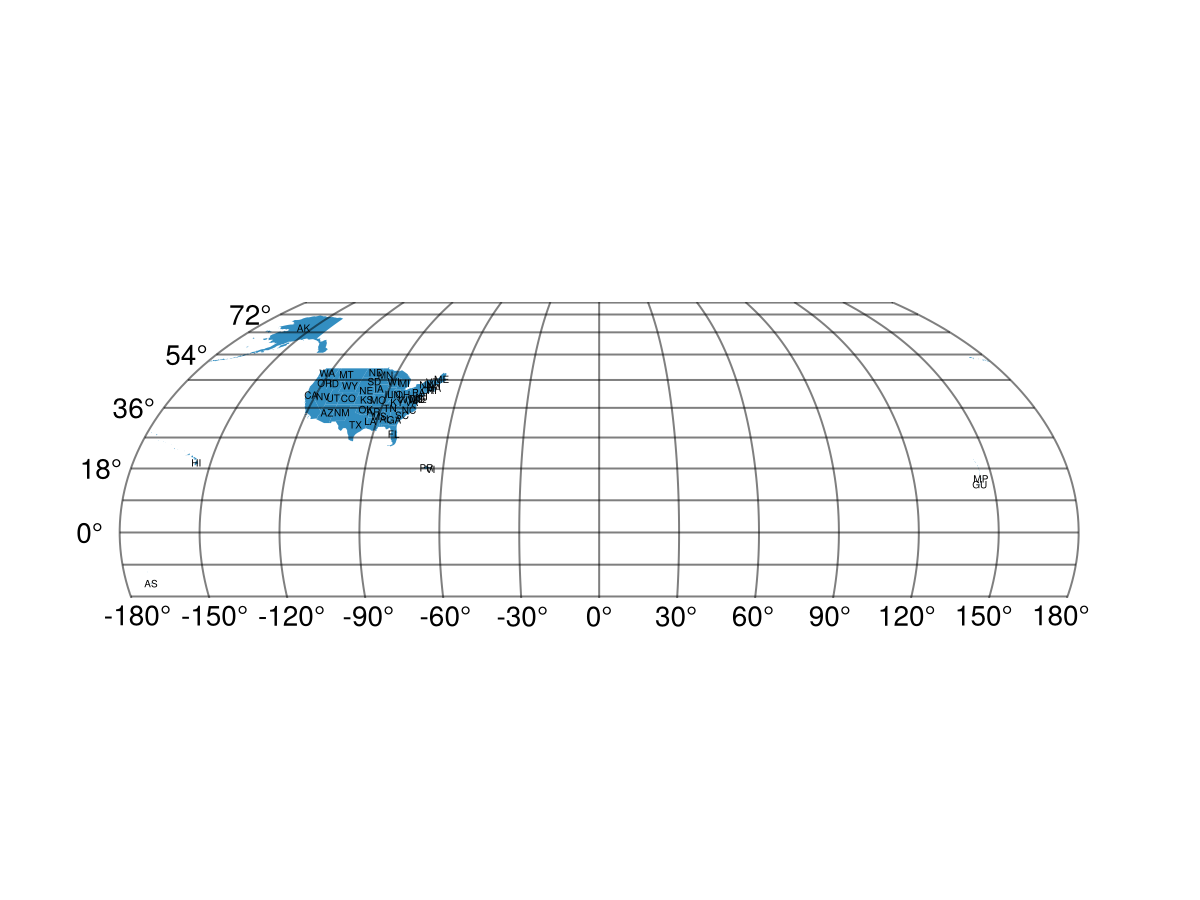

In [10]:
f, a, p = poly(table.geometry; axis = (; type = GeoAxis))
tp = Makie.text!(a, Polylabel.polylabel.(table.geometry); text = string.(table.STUSPS), align = (:center, :center))
tp.fontsize = 5
f

In [11]:
# save f to a file
save("census_map.png", f)